# Robustness quantification in continuous-time data-driven estimation
### System estimation robustness: Parametric initial conditions 

Ayush Pandey

Sep 7, 2025


### Linear Parameter Varying (LPV) Systems
Consider a mass-spring damper system with a scheduling parameter $\theta_1$ in its initial condition. The states ($x$) of a simplified 2D dynamics are the position ($q$) and velocity ($\dot{q}$) of the mass object. The dynamics are given by:  

$ \dot{x} = Ax + Bu $

$ y = Cx + Du $

where 

$ A = \begin{bmatrix} 0 & 1 \\ -20 & -2 \end{bmatrix} $

$ B = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \quad D = 0 $

with initial conditions $x_{\theta}(0) = \begin{bmatrix}\theta_1 \\ 0.5\end{bmatrix}$ as a function of parameter. In this case, the set of parameters $\theta$ is $\left\{ \theta_1 \right\}$, with just one parameter.

We assume an estimated set of initial conditions as $\tilde{x}_{\theta}(0) = \begin{bmatrix}\theta_1 + v \\ 0.5 + w\end{bmatrix}$
where $v$ and $w$ are Gaussian sampled to model estimation errors in initial conditions. Here, we assume $v,w \sim \mathcal{N}(0, 1)$

For this system, we can apply Theorem 2:

$\|\frac{\partial \bar y}{\partial \theta_i}\|^2 \leq \lambda_{\max}(P)\|\frac{\partial\bar{x}(0)}{\partial \theta_i}\|^2 $

where $\bar{y}$ and $\bar{x}(0)$ are the vertically stacked output and the initial condition of the original system and the estimated system respectively.

## Scenarios for system estimation
### Scenarios for system estimation

### Scenario 1: Nominal estimation with low error
$ x_\theta(0)=\begin{bmatrix}\theta_1 \\ 0.5\end{bmatrix},\quad \tilde x_\theta(0)=\begin{bmatrix}\theta_1+v \\ 0.5+w\end{bmatrix},\quad v,w\sim\mathcal{N}(0,1),\quad \Theta=\{\theta_1\}. $

### Scenario 2: Nominal estimation with high error
$ x_\theta(0)=\begin{bmatrix}\theta_1 \\ 0.5\end{bmatrix},\quad \tilde x_\theta(0)=\begin{bmatrix}\theta_1+\beta_1+v \\ 0.5+\beta_2+w\end{bmatrix},\quad v\sim\mathcal{N}(0,\sigma_v^2),\; w\sim\mathcal{N}(0,\sigma_w^2),\quad \Theta=\{\theta_1\}. $

### Scenario 3: Quadratic parameter dependence (single parameter)
$ x_\theta(0)=\begin{bmatrix}\theta_1 + a\,\theta_1^2 \\ 0.5\end{bmatrix},\quad \tilde x_\theta(0)=\begin{bmatrix}\theta_1 + \tilde a\,\theta_1^2 + v \\ 0.5 + w\end{bmatrix},\quad \tilde a=a+\delta_a,\quad v,w\sim\mathcal{N}(0,1),\quad \Theta=\{\theta_1\}. $

### Scenario 4: Two parameters with cross terms
$ x_\theta(0)=\begin{bmatrix}\alpha\,\theta_1^2 + \beta\,\theta_2^2 + \gamma\,\theta_1\theta_2 \\ 0.5\end{bmatrix},\quad \tilde x_\theta(0)=\begin{bmatrix}\tilde\alpha\,\theta_1^2 + \tilde\beta\,\theta_2^2 + \tilde\gamma\,\theta_1\theta_2 + v \\ 0.5 + w\end{bmatrix}, $

$ \tilde\alpha=\alpha+\delta_\alpha,\quad \tilde\beta=\beta+\delta_\beta,\quad \tilde\gamma=\gamma+\delta_\gamma,\quad v,w\sim\mathcal{N}(0,1),\quad \Theta=\{\theta_1,\theta_2\}. $


### Set up all scenarios

In [1]:
from robest import System, AugmentedSystem
import sympy as sp
import numpy as np

np.random.seed(0)

theta1, theta2 = sp.symbols('theta1 theta2', real=True)
B = sp.Matrix([[0], [1]])
C = sp.Matrix([[1, 0]])
D = sp.Matrix([[0]])
A = sp.Matrix([[0, 1],
               [-20, -2]]) 

to_sp = lambda x: sp.Float(float(x))

# Scenario 1
v1 = to_sp(np.random.normal(0, 1))
w1 = to_sp(np.random.normal(0, 1))
x0_true_1 = sp.Matrix([[theta1],
                        [0.5]])
x0_tilde_1 = sp.Matrix([[theta1 + v1],
                        [0.5 + w1]])

param_syms_1 = [theta1]
sys_true_1 = System(A, B, C, D, param_syms_1)
sys_tilde_1 = System(A, B, C, D, param_syms_1)
aug_1 = AugmentedSystem(sys_true_1, sys_tilde_1)

# Scenario 2
beta1 = to_sp(np.random.uniform(-2.0, 2.0))
beta2 = to_sp(np.random.uniform(-0.5, 0.5))
sigma_v, sigma_w = 2.0, 2.0
v2 = to_sp(np.random.normal(0, sigma_v))
w2 = to_sp(np.random.normal(0, sigma_w))
x0_true_2 = sp.Matrix([[theta1],
                        [0.5]])
x0_tilde_2 = sp.Matrix([[theta1 + beta1 + v2],
                        [0.5  + beta2 + w2]])

param_syms_2 = [theta1]
sys_true_2 = System(A, B, C, D, param_syms_2)
sys_tilde_2 = System(A, B, C, D, param_syms_2)
aug_2 = AugmentedSystem(sys_true_2, sys_tilde_2)

# Scenario 3
a3 = to_sp(np.random.uniform(-0.5, 0.5))
delta_a3 = to_sp(np.random.uniform(-0.2, 0.2))
atil3 = a3 + delta_a3
v3 = to_sp(np.random.normal(0, 1))
w3 = to_sp(np.random.normal(0, 1))
x0_true_3  = sp.Matrix([[theta1 + a3*theta1**2],
                        [0.5]])
x0_tilde_3 = sp.Matrix([[theta1 + atil3*theta1**2 + v3],
                        [0.5 + w3]])

param_syms_3 = [theta1]
sys_true_3 = System(A, B, C, D, param_syms_3)
sys_tilde_3 = System(A, B, C, D, param_syms_3)
aug_3 = AugmentedSystem(sys_true_3, sys_tilde_3)

# Scenario 4
alpha4 = to_sp(np.random.uniform(-1.0, 1.0))
beta4 = to_sp(np.random.uniform(-1.0, 1.0))
gamma4 = to_sp(np.random.uniform(-1.0, 1.0))
dalpha4 = to_sp(np.random.uniform(-0.4, 0.4))
dbeta4 = to_sp(np.random.uniform(-0.4, 0.4))
dgamma4 = to_sp(np.random.uniform(-0.4, 0.4))
alphat4 = alpha4 + dalpha4
betat4 = beta4 + dbeta4
gammat4 = gamma4 + dgamma4
v4 = to_sp(np.random.normal(0, 1))
w4 = to_sp(np.random.normal(0, 1))
x0_true_4 = sp.Matrix([[alpha4*theta1**2 + beta4*theta2**2 + gamma4*theta1*theta2],
                        [0.5]])
x0_tilde_4 = sp.Matrix([[alphat4*theta1**2 + betat4*theta2**2 + gammat4*theta1*theta2 + v4],
                        [0.5 + w4]])

param_syms_4 = [theta1, theta2]
sys_true_4 = System(A, B, C, D, param_syms_4)
sys_tilde_4 = System(A, B, C, D, param_syms_4)
aug_4 = AugmentedSystem(sys_true_4, sys_tilde_4)

scenarios = {
    "S1_linear": dict(
        true=sys_true_1, tilde=sys_tilde_1, aug=aug_1, params=["theta1"],
        x0=x0_true_1, x0_tilde=x0_tilde_1
    ),
    "S2_linear_off": dict(
        true=sys_true_2, tilde=sys_tilde_2, aug=aug_2, params=["theta1"],
        x0=x0_true_2, x0_tilde=x0_tilde_2
    ),
    "S3_quadratic": dict(
        true=sys_true_3, tilde=sys_tilde_3, aug=aug_3, params=["theta1"],
        x0=x0_true_3, x0_tilde=x0_tilde_3
    ),
    "S4_two_param": dict(
        true=sys_true_4, tilde=sys_tilde_4, aug=aug_4, params=["theta1", "theta2"],
        x0=x0_true_4, x0_tilde=x0_tilde_4
    ),
}


### Set up the experiment

In [2]:
from utils import make_f_xbar0, make_f_dxbar0

f_dxbar0_map = {}   
f_xbar0_map  = {}   

for name, s in scenarios.items():
    aug = s["aug"]
    param_syms = aug.param_syms
    param_names = s["params"]
    f_xbar0_map[name] = make_f_xbar0(s["x0"], s["x0_tilde"], param_syms)
    for i, pname in enumerate(param_names):
        f_dxbar0_map[(name, pname)] = make_f_dxbar0(s["x0"], s["x0_tilde"], param_syms, i)

T_final = 1.0
dt = 0.001
Tvec = np.arange(0.0, T_final + dt, dt)

u_amp = 0.01
u_freq = 20.0
Uvec = u_amp * np.sin(2 * np.pi * u_freq * Tvec)

theta_grid = np.linspace(0.05, 10.0, 10)
delta_theta = 1e-1
theta1_fixed = 1.0 
theta2_fixed = 0.15


### Compute the bound and the robustness metric

In [3]:
# Compute Theorem 2 bound and evaluate all scenarios when ONLY x0 depends on parameters.
# Classes System and AugmentedSystem are already defined and used exactly as in:
#   sys_true = System(A, B, C, D, param_syms)
#   sys_tilde = System(A, B, C, D, param_syms)
#   aug = AugmentedSystem(sys_true, sys_tilde)

import numpy as np
import pandas as pd
from utils import simulate_ct_system, robustness_R
from utils import compute_theorem2_bound, central_diff_ybar_x0

rows = []
for name, s in scenarios.items():
    sys_true = s["true"]
    sys_tilde = s["tilde"]
    aug_sys = s["aug"]
    param_list = s["params"]   
    f_xbar0 = f_xbar0_map[name]

    for theta in theta_grid:
        if name == "S4_two_param":
            theta_tuple_th1 = (theta, theta2_fixed) 
            theta_tuple_th2 = (theta1_fixed, theta) 
        else:
            theta_tuple_th1 = (theta,)

        if name != "S4_two_param":
            xbar0_cur = f_xbar0(*theta_tuple_th1)
            x0_true_cur, x0_tilde_cur = xbar0_cur[:2], xbar0_cur[2:]
            _, y_true_cur,  _ = simulate_ct_system(sys_true.get_ss(theta_tuple_th1),  Tvec, Uvec, x0_true_cur)
            _, y_tilde_cur, _ = simulate_ct_system(sys_tilde.get_ss(theta_tuple_th1), Tvec, Uvec, x0_tilde_cur)
            ybar_cur = y_true_cur - y_tilde_cur
            ybar_l2_sq = float(np.trapz(ybar_cur**2, Tvec))
            ybar_l2 = float(np.sqrt(max(ybar_l2_sq, 0.0)))

            lhs_ct_sq = central_diff_ybar_x0(
                sys_true, sys_tilde, theta_tuple_th1, param_index=0,
                delta=delta_theta, Tvec=Tvec, Uvec=Uvec, f_xbar0=f_xbar0
            )

            rhs_thm2_sq, info = compute_theorem2_bound(
                sys_true, aug_sys, theta_tuple_th1, f_dxbar0_map[(name, "theta1")]
            )
            dy_true_l2 = float(np.sqrt(max(lhs_ct_sq, 0.0)))
            dy_thm2_l2 = float(np.sqrt(max(rhs_thm2_sq, 0.0)))

            R_true = robustness_R(theta_tuple_th1, {"theta1": dy_true_l2},  ybar_l2, ["theta1"])
            R_thm2 = robustness_R(theta_tuple_th1, {"theta1": dy_thm2_l2},  ybar_l2, ["theta1"])

            rows.append({
                "scenario": name, "param": "theta1", "theta": theta,
                "lhs_ct_sq": lhs_ct_sq,
                "rhs_theorem2": rhs_thm2_sq,
                "lam_max_P": info["lam_max_P"],
                "dxbar0_norm_sq": info["dx_norm2"],
                "ybar_l2_sq": ybar_l2_sq,
                "R_true": R_true, "R_thm2": R_thm2
            })

        else:
            xbar0_th1 = f_xbar0(*theta_tuple_th1)
            x0_true_th1, x0_tilde_th1 = xbar0_th1[:2], xbar0_th1[2:]
            _, y_true_th1,  _ = simulate_ct_system(sys_true.get_ss(theta_tuple_th1),  Tvec, Uvec, x0_true_th1)
            _, y_tilde_th1, _ = simulate_ct_system(sys_tilde.get_ss(theta_tuple_th1), Tvec, Uvec, x0_tilde_th1)
            ybar_th1 = y_true_th1 - y_tilde_th1
            ybar_l2_sq_th1 = float(np.trapz(ybar_th1**2, Tvec))
            ybar_l2_th1 = float(np.sqrt(max(ybar_l2_sq_th1, 0.0)))

            lhs_th1_at_th1 = central_diff_ybar_x0(
                sys_true, sys_tilde, theta_tuple_th1, param_index=0,
                delta=delta_theta, Tvec=Tvec, Uvec=Uvec, f_xbar0=f_xbar0
            )
            lhs_th2_at_th1 = central_diff_ybar_x0(
                sys_true, sys_tilde, theta_tuple_th1, param_index=1,
                delta=delta_theta, Tvec=Tvec, Uvec=Uvec, f_xbar0=f_xbar0
            )

            rhs_thm2_th1_at_th1, info_th1 = compute_theorem2_bound(
                sys_true, aug_sys, theta_tuple_th1, f_dxbar0_map[(name, "theta1")]
            )
            rhs_thm2_th2_at_th1, info_th2 = compute_theorem2_bound(
                sys_true, aug_sys, theta_tuple_th1, f_dxbar0_map[(name, "theta2")]
            )

            dy_true_th1_at_th1 = float(np.sqrt(max(lhs_th1_at_th1, 0.0)))
            dy_true_th2_at_th1 = float(np.sqrt(max(lhs_th2_at_th1, 0.0)))
            dy_thm2_th1_at_th1 = float(np.sqrt(max(rhs_thm2_th1_at_th1, 0.0)))
            dy_thm2_th2_at_th1 = float(np.sqrt(max(rhs_thm2_th2_at_th1, 0.0)))

            R_true_th1 = robustness_R(theta_tuple_th1,
                                      {"theta1": dy_true_th1_at_th1, "theta2": dy_true_th2_at_th1},
                                      ybar_l2_th1, ["theta1", "theta2"])
            R_thm2_th1 = robustness_R(theta_tuple_th1,
                                      {"theta1": dy_thm2_th1_at_th1, "theta2": dy_thm2_th2_at_th1},
                                      ybar_l2_th1, ["theta1", "theta2"])

            rows.append({
                "scenario": name, "param": "theta1", "theta": theta,
                "lhs_ct_sq": lhs_th1_at_th1,
                "rhs_theorem2": rhs_thm2_th1_at_th1,
                "lam_max_P": info_th1["lam_max_P"],
                "dxbar0_norm_sq": info_th1["dx_norm2"],
                "ybar_l2_sq": ybar_l2_sq_th1,
                "R_true": R_true_th1, "R_thm2": R_thm2_th1
            })

            xbar0_th2 = f_xbar0(*theta_tuple_th2)
            x0_true_th2, x0_tilde_th2 = xbar0_th2[:2], xbar0_th2[2:]
            _, y_true_th2,  _ = simulate_ct_system(sys_true.get_ss(theta_tuple_th2),  Tvec, Uvec, x0_true_th2)
            _, y_tilde_th2, _ = simulate_ct_system(sys_tilde.get_ss(theta_tuple_th2), Tvec, Uvec, x0_tilde_th2)
            ybar_th2 = y_true_th2 - y_tilde_th2
            ybar_l2_sq_th2 = float(np.trapz(ybar_th2**2, Tvec))
            ybar_l2_th2 = float(np.sqrt(max(ybar_l2_sq_th2, 0.0)))

            lhs_th1_at_th2 = central_diff_ybar_x0(
                sys_true, sys_tilde, theta_tuple_th2, param_index=0,
                delta=delta_theta, Tvec=Tvec, Uvec=Uvec, f_xbar0=f_xbar0
            )
            lhs_th2_at_th2 = central_diff_ybar_x0(
                sys_true, sys_tilde, theta_tuple_th2, param_index=1,
                delta=delta_theta, Tvec=Tvec, Uvec=Uvec, f_xbar0=f_xbar0
            )

            rhs_thm2_th1_at_th2, info_th1b = compute_theorem2_bound(
                sys_true, aug_sys, theta_tuple_th2, f_dxbar0_map[(name, "theta1")]
            )
            rhs_thm2_th2_at_th2, info_th2b = compute_theorem2_bound(
                sys_true, aug_sys, theta_tuple_th2, f_dxbar0_map[(name, "theta2")]
            )

            dy_true_th1_at_th2 = float(np.sqrt(max(lhs_th1_at_th2, 0.0)))
            dy_true_th2_at_th2 = float(np.sqrt(max(lhs_th2_at_th2, 0.0)))
            dy_thm2_th1_at_th2 = float(np.sqrt(max(rhs_thm2_th1_at_th2, 0.0)))
            dy_thm2_th2_at_th2 = float(np.sqrt(max(rhs_thm2_th2_at_th2, 0.0)))

            R_true_th2 = robustness_R(theta_tuple_th2,
                                      {"theta1": dy_true_th1_at_th2, "theta2": dy_true_th2_at_th2},
                                      ybar_l2_th2, ["theta1", "theta2"])
            R_thm2_th2 = robustness_R(theta_tuple_th2,
                                      {"theta1": dy_thm2_th1_at_th2, "theta2": dy_thm2_th2_at_th2},
                                      ybar_l2_th2, ["theta1", "theta2"])

            rows.append({
                "scenario": name, "param": "theta2", "theta": theta,
                "lhs_ct_sq": lhs_th2_at_th2,
                "rhs_theorem2": rhs_thm2_th2_at_th2,
                "lam_max_P": info_th2b["lam_max_P"],
                "dxbar0_norm_sq": info_th2b["dx_norm2"],
                "ybar_l2_sq": ybar_l2_sq_th2,
                "R_true": R_true_th2, "R_thm2": R_thm2_th2
            })

df_all = pd.DataFrame(rows)
print(df_all.head())


    scenario   param     theta     lhs_ct_sq  rhs_theorem2  lam_max_P  \
0  S1_linear  theta1  0.050000  1.250865e-29      1.208631   0.604315   
1  S1_linear  theta1  1.155556  1.369450e-28      1.208631   0.604315   
2  S1_linear  theta1  2.261111  2.119217e-27      1.208631   0.604315   
3  S1_linear  theta1  3.366667  1.261886e-27      1.208631   0.604315   
4  S1_linear  theta1  4.472222  9.652585e-28      1.208631   0.604315   

   dxbar0_norm_sq  ybar_l2_sq  R_true    R_thm2  
0             2.0    0.882539     1.0  0.944722  
1             2.0    0.882539     1.0  0.425117  
2             2.0    0.882539     1.0  0.274268  
3             2.0    0.882539     1.0  0.202435  
4             2.0    0.882539     1.0  0.160420  


### Plot the results

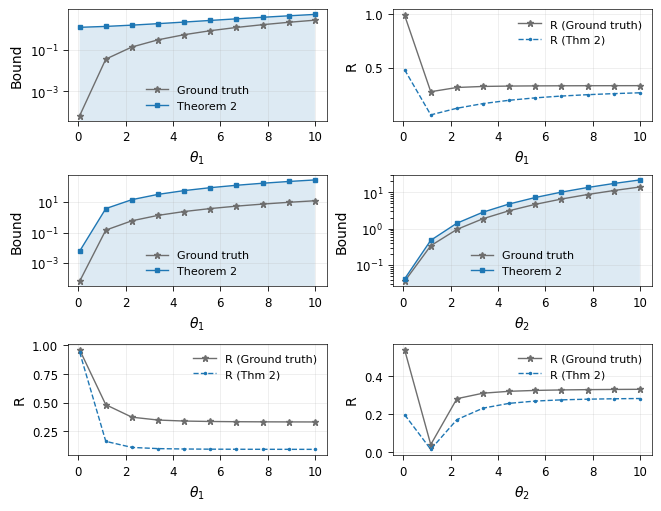

In [6]:
# Plotting for x0-parameter-dependent study (Ground Truth vs Theorem 2 only)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Polygon

# Titles with UPDATED scenario keys (match your df_all/scenarios names)
titles = {
    "S1_linear": "Initial-condition dependence (nominal)",
    "S2_linear_off": "Initial-condition dependence (biased/noisy)",
    "S3_quadratic": "Quadratic in $\\theta_1$ (IC only)",
    "S4_two_param": "Two-parameter IC: $\\theta_1,\\theta_2$",
}

LW = 1.0
MS = 3.0
C_GT = "#6e6e6e"   # ground-truth color (gray)
C_THM = "#1f77b4"  # theorem 2 color (blue)

def _plot_bound(ax, sub, title, xlab):
    s = sub.sort_values("theta")
    x = s["theta"].to_numpy()
    y_thm2 = s["rhs_theorem2"].to_numpy()

    # shaded area under Theorem 2 bound
    ax.fill_between(x, 0.0, y_thm2, color=C_THM, alpha=0.15, linewidth=0, label="_nolegend_", zorder=0)

    # Ground truth (central-difference LHS)
    ax.plot(s["theta"], s["lhs_ct_sq"], color=C_GT, marker="*", markersize=MS+2,
            linewidth=LW, label="Ground truth")

    # Theorem 2 bound
    ax.plot(s["theta"], s["rhs_theorem2"], color=C_THM, marker="s", markersize=MS,
            linewidth=LW, label="Theorem 2", zorder=3)

    ax.set_xlabel(xlab, fontsize=10)
    ax.set_ylabel("Bound", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8.5, width=0.6)
    ax.grid(True, linewidth=0.4, alpha=0.35)
    ax.legend(fontsize=8, loc="best", frameon=False)

def _plot_R(ax, sub, title, xlab):
    s = sub.sort_values("theta")

    # R curves (ground truth and theorem 2)
    ax.plot(s["theta"], s["R_true"], color=C_GT, linestyle="-",  marker="*", markersize=MS+2,
            linewidth=LW, label="R (Ground truth)")
    ax.plot(s["theta"], s["R_thm2"], color=C_THM, linestyle="--", marker=".",  markersize=MS,
            linewidth=LW, label="R (Thm 2)")

    # tight autoscale to these two curves
    yvals = np.concatenate([s["R_true"].values, s["R_thm2"].values])
    yvals = yvals[np.isfinite(yvals)]
    if yvals.size:
        ymin, ymax = float(np.nanmin(yvals)), float(np.nanmax(yvals))
        if np.isclose(ymin, ymax):
            pad = 0.05 if ymax == 0 else 0.05 * abs(ymax)
            ax.set_ylim(ymax - pad, ymax + pad)
        else:
            pad = 0.06 * (ymax - ymin)
            ax.set_ylim(ymin - pad, ymax + pad)

    ax.set_xlabel(xlab, fontsize=10)
    ax.set_ylabel("R", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8.5, width=0.6)
    ax.grid(True, linewidth=0.4, alpha=0.35)
    ax.legend(fontsize=8, loc="best", frameon=False)

# 3x3 layout (left two columns for S1, S2, S3; right column for S4 with insets)
fig, axes = plt.subplots(3, 2, figsize=(6.5, 5.0), sharex=False, sharey=False, constrained_layout=True)
(ax00, ax01,
 ax10, ax11,
 ax20, ax21) = axes.ravel()


# --- S3: bounds (left-bottom), R (middle-bottom) ---
sub3 = df_all[(df_all["scenario"]=="S3_quadratic") & (df_all["param"]=="theta1")]
_plot_bound(ax00, sub3, titles["S3_quadratic"], "$\\theta_1$")
_plot_R(ax01, sub3, titles["S3_quadratic"], "$\\theta_1$")

# --- S4 (two-parameter): right column ---
# θ1-sweep bounds (top-right)
sub4_th1 = df_all[(df_all["scenario"]=="S4_two_param") & (df_all["param"]=="theta1")]
_plot_bound(ax10, sub4_th1, titles["S4_two_param"], "$\\theta_1$")

# θ2-sweep bounds (middle-right)
sub4_th2 = df_all[(df_all["scenario"]=="S4_two_param") & (df_all["param"]=="theta2")]
_plot_bound(ax11, sub4_th2, "", "$\\theta_2$")

# Bottom-right: show two R panels as insets (θ1-sweep and θ2-sweep)
# ax22.set_axis_off()

# inset for θ1-sweep R
# in1 = ax22.inset_axes([0.10, 0.53, 0.85, 0.42])
_plot_R(ax20, sub4_th1, "R at $(\\theta_1,\\theta_2^*)$", "$\\theta_1$")
# leg = in1.get_legend()
# if leg: leg.remove()

# inset for θ2-sweep R
# in2 = ax21.inset_axes([0.10, 0.06, 0.85, 0.42])
_plot_R(ax21, sub4_th2, "R at $(\\theta_1^*,\\theta_2)$", "$\\theta_2$")
# leg = in2.get_legend()
# if leg: leg.remove()

# Cosmetic tweaks for all axes
for ax in axes.ravel():
    ax.tick_params(axis="both", which="both", labelsize=8.5, width=0.6)

# Darken spines slightly for print
for ax in [ax00, ax01, ax10, ax11, ax20, ax21]:
    for spine in ax.spines.values():
        spine.set_linewidth(0.6)
        spine.set_alpha(0.8)

# Log y-scale for bound panels
for ax in [ax00, ax10, ax11]:
    ax.set_yscale("log")

plt.savefig("results_x0_param.svg", bbox_inches="tight")
plt.show()
